In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
if not os.path.isdir("data"):
    print("Downloading data!")
    os.makedirs("data")
    !cd data && kaggle datasets download -d ex0ticone/house-prices-of-sao-paulo-city && unzip house-prices-of-sao-paulo-city.zip && rm house-prices-of-sao-paulo-city.zip
    print("Data downloaded!")
else:
    print("Data already downloaded!")

Data already downloaded!


In [3]:
!head data/housing_sp_city.csv

logradouro,numero,bairro,cep,cidade,tipo_imovel,area_util,banheiros,suites,quartos,vagas_garagem,anuncio_criado,tipo_anuncio,preco_venda,taxa_condominio,periodicidade,preco_aluguel,iptu_ano
Rua Juvenal Galeno,53,Jardim da Saúde,04290030,São Paulo,Casa de dois andares,388,3,1,4,6,2017-02-07,Venda,700000,NA,NA,NA,NA
Rua Juruaba,16,Vila Santa Teresa (Zona Sul),04187320,São Paulo,Casa,129,2,1,3,2,2016-03-21,Venda,336000,NA,NA,NA,NA
Avenida Paulista,402,Bela Vista,01311000,São Paulo,Comercial,396,4,0,0,5,2018-12-18,Locação,24929,4900,MONTHLY,29829,4040
Rua Alvorada,1190,Vila Olímpia,04550004,São Paulo,Apartamento,80,2,1,3,2,2018-10-26,Venda,739643,686,NA,NA,1610
Rua Curitiba,380,Paraíso,04005030,São Paulo,Apartamento,3322,5,4,4,5,2018-12-14,Venda,7520099,6230,NA,NA,18900
Rua Pintassilgo,477,Vila Uberabinha,04514032,São Paulo,Flat,45,0,1,1,1,2018-10-09,Locação,1889,560,MONTHLY,2450,87
Rua Mateus Grou,586,Pinheiros,05415040,São Paulo,Apartamento,94,1,0,3,2,2018-05-29,Venda,630700,1120,NA,NA,4

In [4]:
property_types = [
    "Apartamento",
    "Casa de dois andares",
    "Casa",
    "Condomínio",
    "Cobertura",
    "Flat",
    "Escritório",
]

sp_data = pd.read_csv("data/housing_sp_city.csv", encoding="ISO-8859-1").drop(
    columns=[
        "bairro",
        "numero",
        "logradouro",
        "cidade",
        "cep",
        "preco_aluguel",
        "periodicidade",
        "taxa_condominio",
        "iptu_ano",
        "anuncio_criado"
    ]
)
sp_data.drop(
    sp_data[
        (sp_data["tipo_anuncio"] != "Venda")
        | ~(sp_data["tipo_imovel"]).isin(property_types)
    ].index,
    inplace=True,
)
sp_data.drop(columns=["tipo_anuncio"], inplace=True)
sp_data.head()

,tipo_imovel,area_util,banheiros,suites,quartos,vagas_garagem,preco_venda
0,Casa de dois andares,388.0,3.0,1.0,4.0,6.0,700000
1,Casa,129.0,2.0,1.0,3.0,2.0,336000
3,Apartamento,80.0,2.0,1.0,3.0,2.0,739643
4,Apartamento,3322.0,5.0,4.0,4.0,5.0,7520099
6,Apartamento,94.0,1.0,0.0,3.0,2.0,630700


In [5]:
sp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93711 entries, 0 to 133962
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tipo_imovel    93711 non-null  object 
 1   area_util      92066 non-null  float64
 2   banheiros      93706 non-null  float64
 3   suites         86000 non-null  float64
 4   quartos        93708 non-null  float64
 5   vagas_garagem  92117 non-null  float64
 6   preco_venda    93711 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 5.7+ MB


In [6]:
sp_data.describe()

,area_util,banheiros,suites,quartos,vagas_garagem,preco_venda
count,92066.000000,93706.000000,86000.000000,93708.000000,92117.000000,9.371100e+04
mean,145.297689,2.426984,1.240512,2.670146,2.119033,7.875532e+05
std,560.545851,1.699433,1.194477,0.942181,1.833895,1.091308e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.050000e+04
25%,64.000000,1.000000,0.000000,2.000000,1.000000,2.975000e+05
50%,103.000000,2.000000,1.000000,3.000000,2.000000,4.794990e+05
75%,176.000000,3.000000,2.000000,3.000000,3.000000,8.435000e+05
max,129000.000000,99.000000,80.000000,40.000000,215.000000,7.420000e+07


In [7]:
sp_data.describe(include="O")

,tipo_imovel
count,93711
unique,5
top,Apartamento
freq,64146


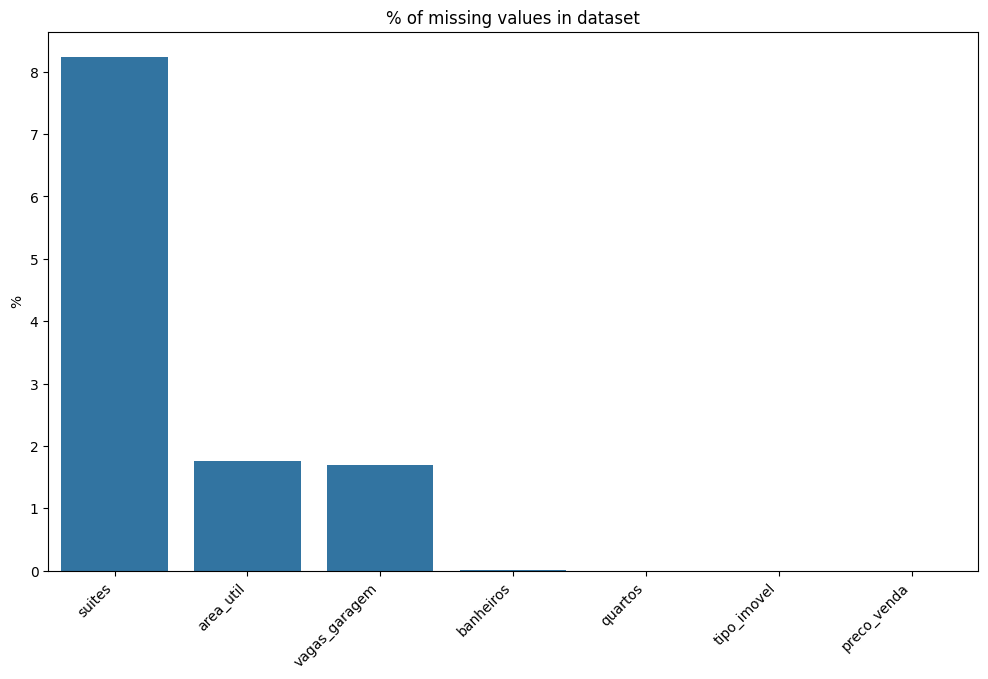

In [8]:
plt.figure(figsize=(12, 7))
sns.barplot((sp_data.isnull().sum() / len(sp_data) * 100).sort_values(ascending=False))
plt.title("% of missing values in dataset")
plt.xticks(rotation=45, ha="right")
plt.ylabel("%")
plt.show()

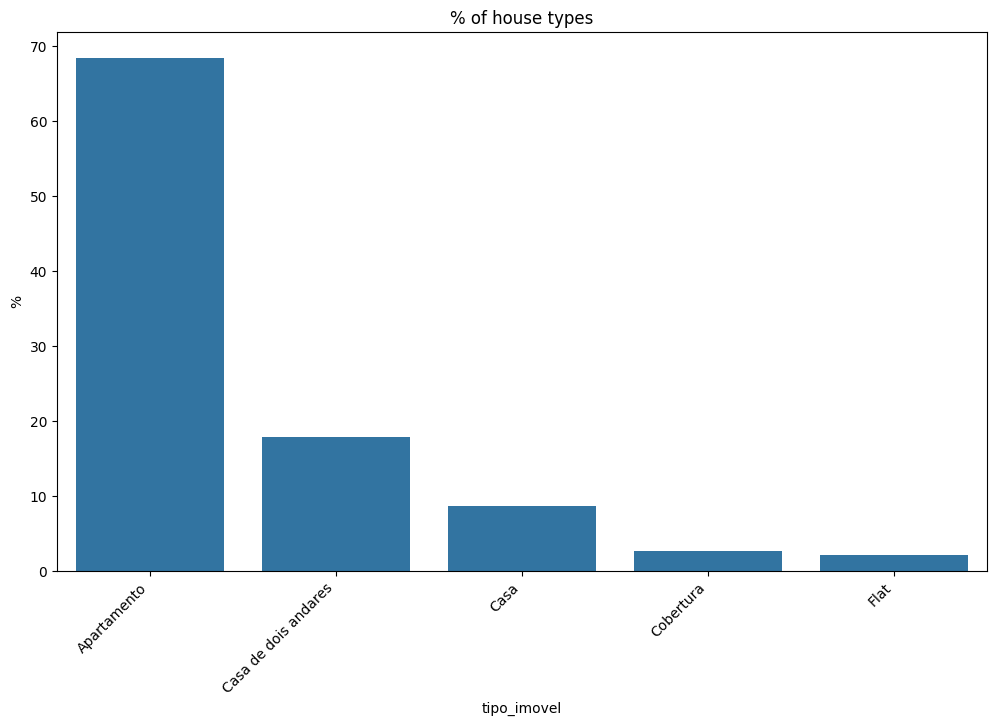

In [9]:
plt.figure(figsize=(12, 7))
sns.countplot(
    x="tipo_imovel",
    data=sp_data,
    stat="percent",
    order=sp_data["tipo_imovel"].value_counts().index,
)
plt.title("% of house types")
plt.xticks(rotation=45, ha="right")
plt.ylabel("%")
plt.show()

In [10]:
sp_data.rename(columns={
    'tipo_imovel': 'property_type',
    'area_util': 'usable_area',
    'banheiros': 'bathrooms',
    'suites': 'suites',
    'quartos': 'bedrooms',
    'vagas_garagem': 'garage_spots',
    'anuncio_criado': 'ad_creation_date',
    'preco_venda': 'sale_price'
}, inplace=True)

sp_data

,property_type,usable_area,bathrooms,suites,bedrooms,garage_spots,sale_price
0,Casa de dois andares,388.0,3.0,1.0,4.0,6.0,700000
1,Casa,129.0,2.0,1.0,3.0,2.0,336000
3,Apartamento,80.0,2.0,1.0,3.0,2.0,739643
4,Apartamento,3322.0,5.0,4.0,4.0,5.0,7520099
6,Apartamento,94.0,1.0,0.0,3.0,2.0,630700
...,...,...,...,...,...,...,...
133957,Apartamento,270.0,4.0,3.0,3.0,4.0,2835000
133958,Apartamento,60.0,1.0,NaN,1.0,1.0,251999
133959,Apartamento,53.0,2.0,1.0,2.0,1.0,249782
133961,Apartamento,20.0,3.0,2.0,3.0,2.0,623000


In [11]:
sp_data.to_parquet("data/processed_housing_sp_city.parquet")